# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | ziniare
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | cuamba
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | butaritari
City not found. Skipping...
Processing Record 12 of Set 1 | severodvinsk
Processing Record 13 of Set 1 | tiksi
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | colares
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | cidreira
City not found. Skipping...
Processing Record 23 of

Processing Record 41 of Set 4 | havre-saint-pierre
Processing Record 42 of Set 4 | kurchum
Processing Record 43 of Set 4 | gondanglegi
Processing Record 44 of Set 4 | kondinskoye
Processing Record 45 of Set 4 | calama
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | aswan
Processing Record 48 of Set 4 | mecca
Processing Record 49 of Set 4 | paamiut
Processing Record 1 of Set 5 | tondano
Processing Record 2 of Set 5 | boundiali
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | gao
Processing Record 5 of Set 5 | beyneu
City not found. Skipping...
Processing Record 6 of Set 5 | bilibino
City not found. Skipping...
Processing Record 7 of Set 5 | longyearbyen
City not found. Skipping...
Processing Record 8 of Set 5 | saint-francois
Processing Record 9 of Set 5 | bobovdol
Processing Record 10 of Set 5 | connersville
Processing Record 11 of Set 5 | bam
Processing Record 12 of Set 5 | kloulklubed
Processing Record 13 of Set 5 | smithers
Processing R

Processing Record 27 of Set 8 | samarai
Processing Record 28 of Set 8 | saryozek
Processing Record 29 of Set 8 | port macquarie
Processing Record 30 of Set 8 | mmabatho
Processing Record 31 of Set 8 | kipushi
Processing Record 32 of Set 8 | yasnyy
Processing Record 33 of Set 8 | pangnirtung
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | farafangana
Processing Record 36 of Set 8 | puntarenas
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | gympie
Processing Record 39 of Set 8 | savelugu
Processing Record 40 of Set 8 | arcata
Processing Record 41 of Set 8 | luangwa
Processing Record 42 of Set 8 | mehamn
Processing Record 43 of Set 8 | hibbing
Processing Record 44 of Set 8 | kamina
Processing Record 45 of Set 8 | krasnoyarskiy
Processing Record 46 of Set 8 | matara
Processing Record 47 of Set 8 | seoul
Processing Record 48 of Set 8 | maragogipe
Processing Record 49 of Set 8 | tubuala
Processing Record 1 of Set 9 | dingle
Processing Record 2 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
#Create dataframe
weather_df = pd.DataFrame(weather_dict)
#display head
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ilulissat,100,GL,1573766553,39,69.22,-51.10,44.60,27.51
1,ziniare,1,BF,1573766555,23,12.58,-1.30,86.00,7.02
2,inhambane,100,MZ,1573766555,81,-23.87,35.38,77.22,10.98
3,vila velha,75,IT,1573766556,93,45.18,8.40,48.99,12.75
4,yellowknife,75,CA,1573766556,76,62.45,-114.38,-5.01,3.36


In [6]:
# be sure there aren't any NaN values 
weather_df.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [7]:
#export to csv 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

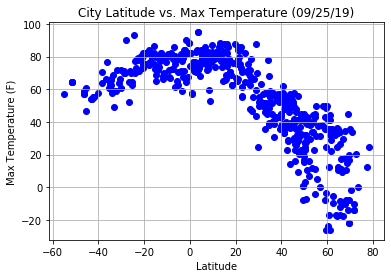

In [8]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'],facecolors ='blue')
#Labels
plt.title("City Latitude vs. Max Temperature (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save plt as png
plt.savefig("figure_output/fig_latvtemp.png")
#show plot
plt.show()

In [ ]:
# In the above plot, the correlation between a city's latitude and temperature are displayed, with latitude serving as
# the independent variable. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

#### Latitude vs. Humidity Plot

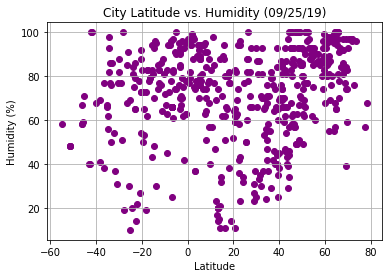

In [9]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'],facecolors ='purple')
#Labels
plt.title("City Latitude vs. Humidity (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save plt as png
plt.savefig("figure_output/fig_latvhum.png")
#show plot
plt.show()

In [ ]:
# In the above plot, the correlation between a city's latitude and humidity are displayed, with latitude serving as
# the independent variable. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

#### Latitude vs. Cloudiness Plot

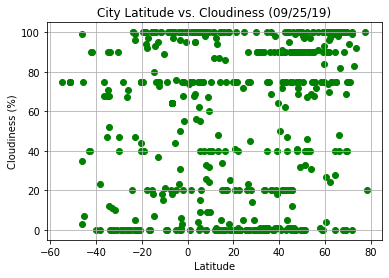

In [10]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],facecolors ='green')
#Labels
plt.title("City Latitude vs. Cloudiness (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save plt as png
plt.savefig("figure_output/latvcloud.png")
#show plot
plt.show()

In [ ]:
# In the above plot, the correlation between a city's latitude and cloudiness are displayed, with latitude serving as
# the independent variable. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

#### Latitude vs. Wind Speed Plot

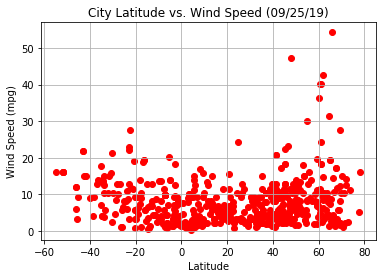

In [11]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],facecolors ='red')
#Labels
plt.title("City Latitude vs. Wind Speed (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()

#save plt as png
plt.savefig("figure_output/latvwind.png")
#show plot
plt.show()

In [ ]:
# In the above plot, the correlation between a city's latitude and wind speed are displayed, with latitude serving as
# the independent variable. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['Lat'] > 0]
northern_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ilulissat,100,GL,1573766553,39,69.22,-51.10,44.60,27.51
1,ziniare,1,BF,1573766555,23,12.58,-1.30,86.00,7.02
3,vila velha,75,IT,1573766556,93,45.18,8.40,48.99,12.75
4,yellowknife,75,CA,1573766556,76,62.45,-114.38,-5.01,3.36
8,east london,56,UG,1573766557,78,3.43,31.70,71.71,1.77


In [13]:
southern_df = weather_df[weather_df['Lat'] < 0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,inhambane,100,MZ,1573766555,81,-23.87,35.38,77.22,10.98
5,cuamba,80,MZ,1573766556,48,-14.80,36.54,79.72,3.42
6,busselton,0,AU,1573766556,50,-33.64,115.35,59.00,15.08
7,padang,100,ID,1573766557,95,-0.92,100.36,67.44,4.12
14,touros,20,BR,1573766559,74,-5.20,-35.46,78.80,13.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8492315715373303


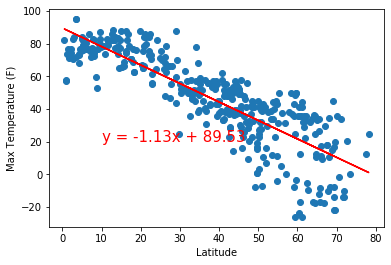

In [14]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6356108683977295


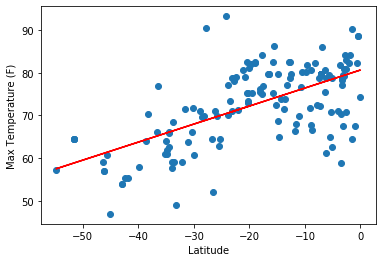

In [15]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
# In the two preceeding plots, the correlation between a city's latitude and temperature are displayed, 
# with latitude serving as the independent variable. This time, the analysis is split between Northern Hemisphere 
# and Southern Hemisphere. It displays a strongly negative relationship in the Northern Hemisphere, and a moderately positive relationship
# in the Southern Hemisphere. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2479217191253293


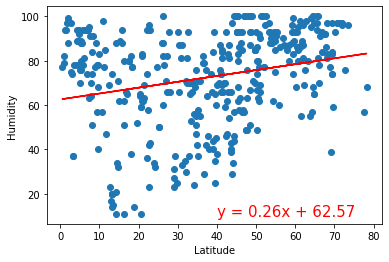

In [16]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2772417321556235


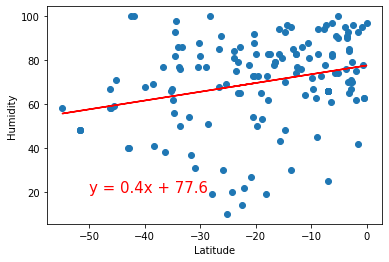

In [17]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
# In the two preceeding plots, the correlation between a city's latitude and humidity are displayed, 
# with latitude serving as the independent variable. This time, the analysis is split between Northern Hemisphere 
# and Southern Hemisphere. It displays a moderately positive relationship in the Northern Hemisphere, and a moderately positive relationship
# in the Southern Hemisphere. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22565868560162172


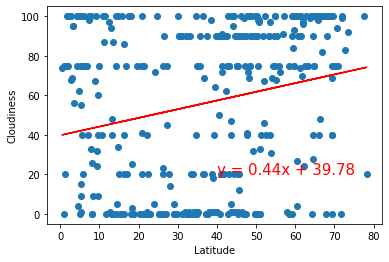

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14480784613972736


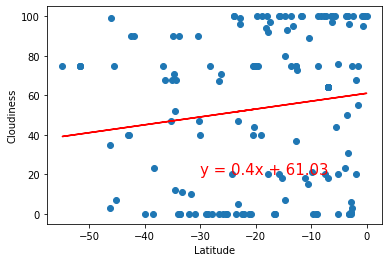

In [19]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
# In the two preceeding plots, the correlation between a city's latitude and cloudiness are displayed, 
# with latitude serving as the independent variable. This time, the analysis is split between Northern Hemisphere 
# and Southern Hemisphere. It displays a weakly positive relationship in the Northern Hemisphere, and a weakly positive relationship
# in the Southern Hemisphere. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2876201137126649


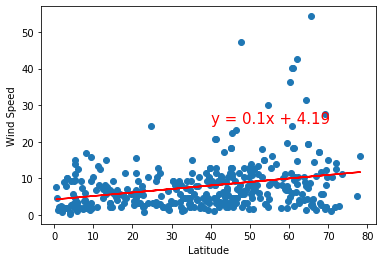

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3932755057344683


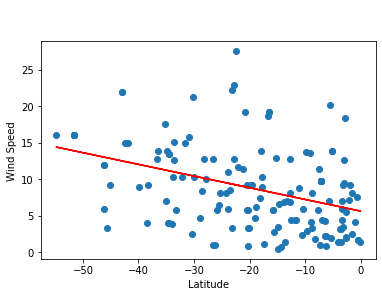

In [21]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
# In the two preceeding plots, the correlation between a city's latitude and wind speed are displayed, 
# with latitude serving as the independent variable. This time, the analysis is split between Northern Hemisphere 
# and Southern Hemisphere. It displays a weakly postive relationship in the Northern Hemisphere, and a weakly negative relationship
# in the Southern Hemisphere. The code that displays it utilizes the matplotlib library to display the data visually.
# The code also saves a .png file of the image to the working directory.